In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diamonds.csv')
df.head()
# unamed columns, let change that

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = pd.read_csv('diamonds.csv',index_col=0) # index_co lets me get rid of/not show 1st columns
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.shape

(53940, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.isnull().sum() # seeing how many empty values are in our dataset
# no missing values, nice!

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### 1. Which cut has the price?

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
np.unique(df['cut']) # trying to see all the different cuts

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [12]:
fair = df[df['cut']=='Fair']
fair.shape

(1610, 10)

In [13]:
ideal = df[df['cut']=='Ideal']
premium = df[df['cut']=='Premium']
good = df[df['cut']=='Good']
very_good = df[df['cut']=='Very Good']

In [14]:
very_good.shape

(12082, 10)

In [15]:
ideal.shape

(21551, 10)

In [16]:
premium.shape

(13791, 10)

In [17]:
good.shape

(4906, 10)

In [18]:
df['price'].max()

18823

In [19]:
df[df['price']==18823]

,carat,cut,color,clarity,depth,table,price,x,y,z
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


### 2.Which clarity has the avg highest price?

In [20]:
df['price'].mean()

3932.799721913237

In [21]:
mean_price = df[df['price']>3932]

In [22]:
mean_price.shape

(19657, 10)

In [23]:
mean_price[['clarity','price']].value_counts().sort_values(ascending=False)

clarity  price
SI1      4989     17
         3950     17
         5292     16
VS2      6108     16
SI2      4077     15
                  ..
VS2      7174      1
VVS2     4467      1
VS2      7176      1
VVS2     4464      1
         18768     1
Length: 13237, dtype: int64

In [24]:
mean_price

,carat,cut,color,clarity,depth,table,price,x,y,z
5904,0.90,Premium,H,VS2,62.6,58.0,3933,6.14,6.19,3.86
5905,0.93,Very Good,G,SI1,62.5,57.8,3933,6.15,6.28,3.87
5906,0.83,Ideal,D,SI1,61.5,53.0,3933,6.09,6.07,3.74
5907,0.90,Good,E,SI1,60.8,65.0,3933,6.14,6.17,3.74
5908,0.81,Ideal,F,VS1,61.5,55.0,3933,6.01,5.96,3.68
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [25]:
mean_price_clarity = mean_price['clarity'].value_counts()
mean_price_clarity

SI1     5453
SI2     4848
VS2     4365
VS1     2661
VVS2    1210
VVS1     557
IF       302
I1       261
Name: clarity, dtype: int64

In [45]:
SI1 = mean_price[mean_price['clarity']=='SI1']
SI2 = mean_price[mean_price['clarity']=='SI2']
VS1 = mean_price[mean_price['clarity']=='VS1']
VS2 = mean_price[mean_price['clarity']=='VS2']
VVS2 = mean_price[mean_price['clarity']=='VVS2']
VVS1 = mean_price[mean_price['clarity']=='VVS1']
IF = mean_price[mean_price['clarity']=='IF']
I1 = mean_price[mean_price['clarity']=='I1']

SI1    5453
Name: clarity, dtype: int64

In [53]:
print(VS2['price'].max()) # Highest price per clarity

18823


### 3. Whch color has the highest price?

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
np.unique(df['color'])

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [29]:
color_d = df[df['color']=='D']
color_d['price'].max()

18693

In [30]:
color_e = df[df['color']=='E']
color_e['price'].max()

18731

In [31]:
color_f = df[df['color']=='F']
color_f['price'].max()

18791

In [32]:
color_g = df[df['color']=='G']
color_g['price'].max()

18818

In [33]:
color_h = df[df['color']=='H']
color_h['price'].max()

18803

In [34]:
color_i = df[df['color']=='I']
color_i['price'].max()

18823

In [35]:
color_j = df[df['color']=='J']
color_j['price'].max()

18710

In [36]:
# color I has the highest overall price 

### 4. Which columns has the highest corrlation?

In [37]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [55]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

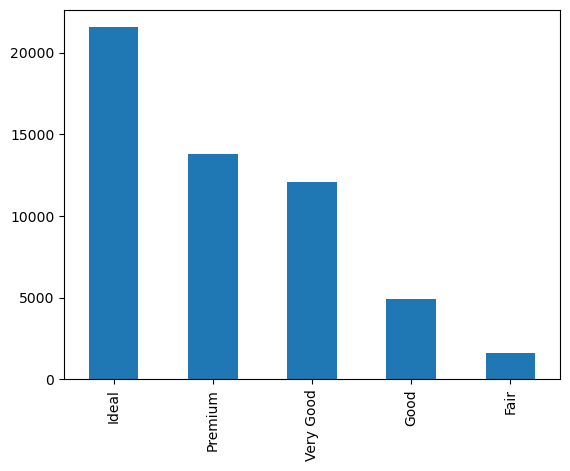

In [56]:
df['cut'].value_counts().plot(kind='bar')

<AxesSubplot:>

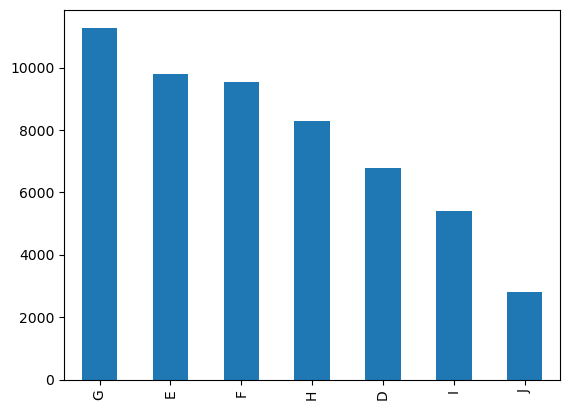

In [57]:
df['color'].value_counts().plot(kind='bar') # g is the mid color

<AxesSubplot:>

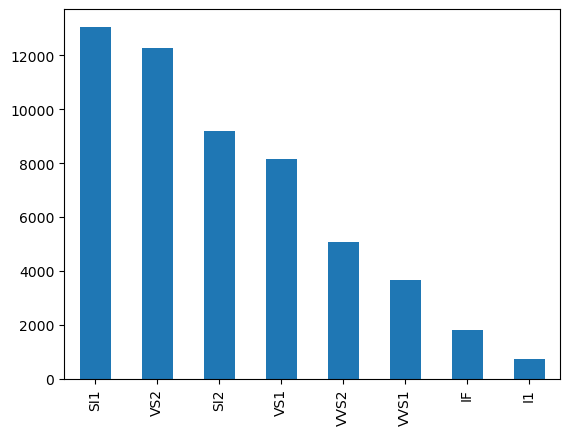

In [58]:
df['clarity'].value_counts().plot(kind='bar') # sI2 is one of the worst clarity

In [61]:
#Lets take a look at the worst color,clarity,etc.
I1 # worst clarity, ehy is that?

,carat,cut,color,clarity,depth,table,price,x,y,z
5930,1.12,Premium,E,I1,61.0,59.0,3942,6.70,6.74,4.10
5932,1.10,Ideal,E,I1,61.9,56.0,3942,6.63,6.59,4.09
5943,1.12,Ideal,G,I1,60.3,57.0,3945,6.80,6.73,4.08
5969,1.14,Premium,D,I1,61.8,59.0,3950,6.62,6.74,4.13
6022,1.18,Very Good,E,I1,63.3,57.0,3965,6.70,6.64,4.22
...,...,...,...,...,...,...,...,...,...,...
26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
26745,3.01,Ideal,J,I1,65.4,60.0,16538,8.99,8.93,5.86
27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


<AxesSubplot:>

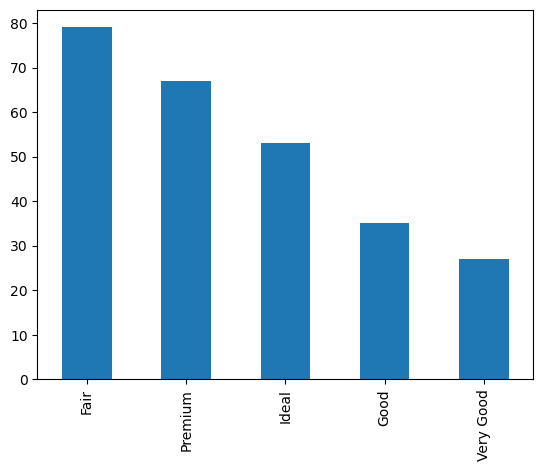

In [75]:
I1['cut'].value_counts().plot(kind='bar') 

In [64]:
I1['cut'].value_counts() # most of the cuts are fair, not too good but, they alos have a good amount of everything else

Fair         79
Premium      67
Ideal        53
Good         35
Very Good    27
Name: cut, dtype: int64

In [ ]:
#x length in mm (0--10.74)

#y width in mm (0--58.9)

#z depth in mm (0--31.8

In [68]:
I1['x'].mean() # length is pretty high, almost 8

7.7893103448275856

In [69]:
I1['y'].mean() # pretty low

7.743716475095784

In [70]:
I1['z'].mean() # pretty low

4.880996168582379

In [71]:
# Maybe length is the reason this dianond has many different cut

<AxesSubplot:>

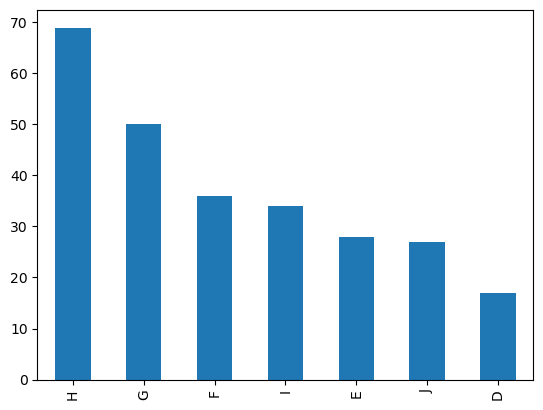

In [76]:
I1['color'].value_counts().plot(kind='bar') # not good or bad color

In [78]:
# on the other hand, why is IF the best clarity?
IF

,carat,cut,color,clarity,depth,table,price,x,y,z
5954,0.70,Ideal,G,IF,61.3,56.0,3949,5.72,5.73,3.51
5976,0.72,Premium,E,IF,61.3,60.0,3951,5.74,5.71,3.51
6085,0.80,Ideal,H,IF,62.4,54.0,3972,5.93,5.99,3.72
6239,0.71,Ideal,H,IF,61.2,56.0,4007,5.76,5.86,3.54
6311,0.56,Very Good,D,IF,62.5,59.0,4025,5.26,5.30,3.30
...,...,...,...,...,...,...,...,...,...,...
27636,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01
27637,1.50,Very Good,F,IF,63.2,58.0,18552,7.20,7.32,4.59
27651,2.29,Premium,J,IF,61.4,60.0,18594,8.49,8.45,5.20
27678,1.28,Ideal,E,IF,60.7,57.0,18700,7.09,6.99,4.27


In [79]:
IF['price'].max()

18806

In [85]:
df[['price','clarity']].sort_values(by='price',ascending=False)

,price,clarity
27750,18823,VS2
27749,18818,SI1
27748,18806,IF
27747,18804,SI2
27746,18803,SI1
...,...,...
5,335,SI2
4,334,VS2
3,327,VS1
2,326,SI1


<AxesSubplot:>

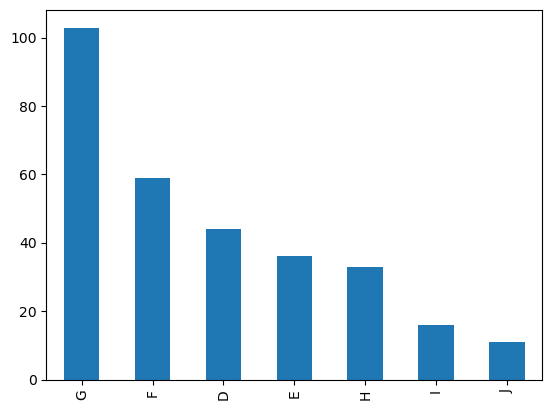

In [87]:
IF['color'].value_counts().plot(kind='bar')

In [88]:
IF['x'].mean()

6.6283774834437095

In [89]:
IF['y'].mean()

6.6491721854304675

In [90]:
IF['z'].mean() 

4.080860927152317

In [95]:
# IF has a higher mean compared to the overall dataset

5.731157211716609

In [96]:
df['x'].min()

0.0

# Techniques from others

In [97]:
# X,y,z have min values of zero, cant have that
# how we get rid of zero/ data that is bad
df.loc[(df['x']==0)   | (df['y']==0) | (df['z']==0) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [99]:
len(df[(df['x']==0)   | (df['y']==0) | (df['z']==0)])

20

In [100]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [101]:
df.loc[(df['x']==0)   | (df['y']==0) | (df['z']==0) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
